<a href="https://www.kaggle.com/code/chakkmorris/titanic?scriptVersionId=96258468" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline

%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("../input/titanic/train.csv", index_col='PassengerId')
test  = pd.read_csv('../input/titanic/test.csv',  index_col='PassengerId')

train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


*I will start with some data exploration of the train dataset*

In [3]:
print(train.shape)
print(test.shape)


(891, 11)
(418, 10)


# Data Exploration


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We have a total of 12 variables in the training dataset: 8 numeric, 4 categorical (test dataset does not have a target variable). 

Categorical variables :
* Survived - encoded as : 0 = No, 1 = Yes
* PClass - Ticket class : 1 is upper class, 2 is mid class, 3 is lower. 
* Sex - male or femle.
* Embarked -  Port of Embarkation:	C = Cherbourg, Q = Queenstown, S = Southampton

Numeric columns :
* PassengerId
* Name
* Age
* SibSp- number of siblings / spouses aboard the Titanic
* Parch - number of parents / children aboard the Titanic
* Ticket
* Fare
* Cabin

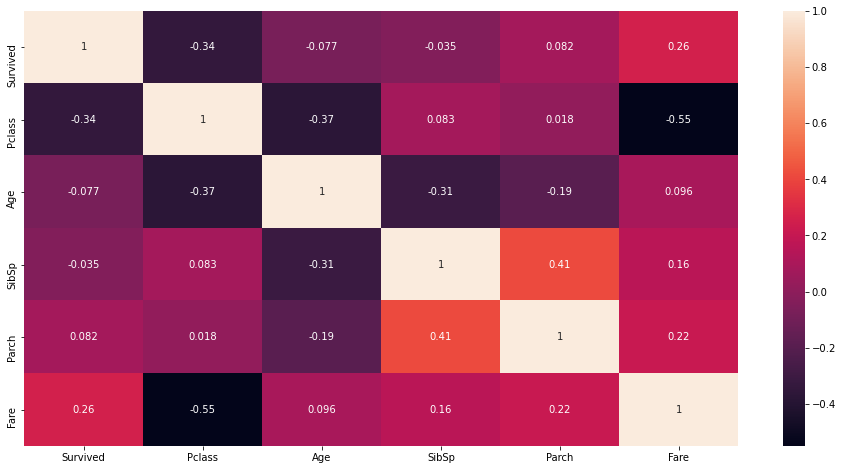

In [5]:
# correlations
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

We can easily see that no two features are very correlated

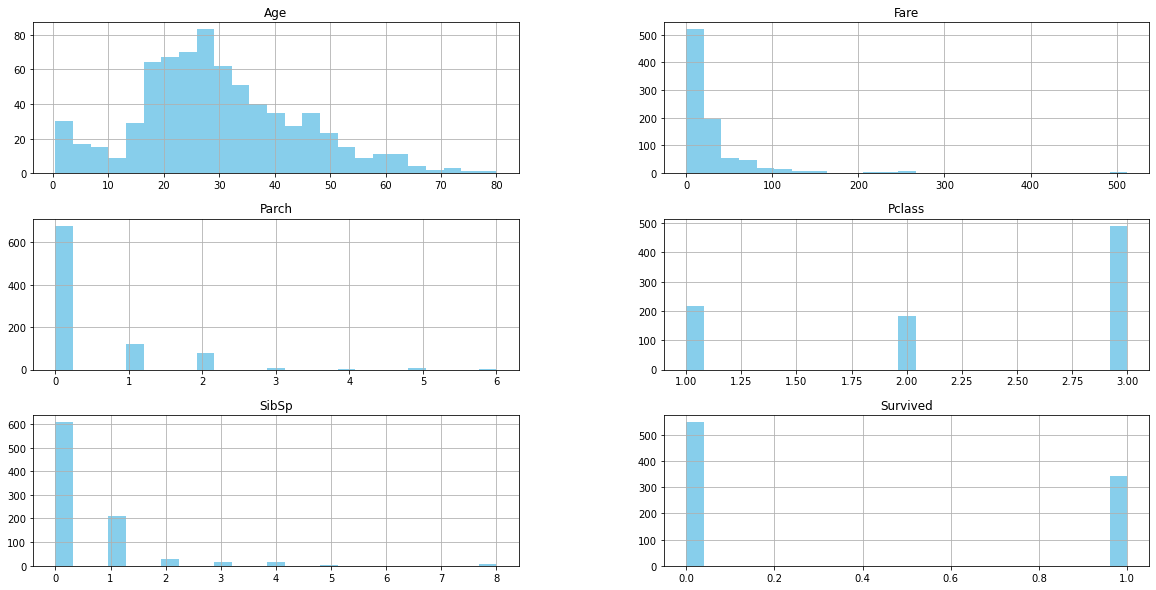

In [6]:
# distributions
train.hist(figsize=(20,10), color='skyblue', bins=25)
plt.show()


In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


observations:

* Higher class pasangers seam to have a better chance of survival, as  Pclass in negativly correlated with Survived. 
* Fare is negativly correlated with Pclass, as higher class (Pclass=1) tickets would cost more.
* Most passangers' age was between 15 and 40.
* At least 50% of passangers are 3rd class passangers. 
* Most people were traveling alone (at least 75% of passangers had no sibling (SibSp), at least 75% had no parents (Parch))


Lets try and visualize the data:

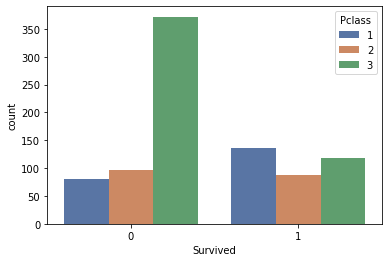

In [8]:
sns.countplot(data=train,x='Survived', hue='Pclass',palette='deep')

We can see that most passangers from 3rd class did not dsurvive, and 1st class is the only class with more survivors than not. 

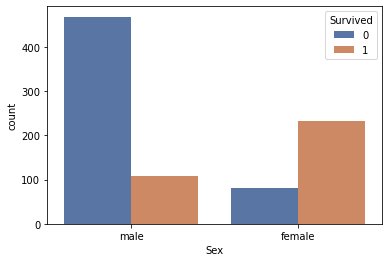

In [9]:
sns.countplot(data=train,x='Sex', hue='Survived',palette='deep')
# It seams that women had a much higher survival rate than men. 

In [10]:
train.corr().abs()['Survived'].sort_values(ascending=False)

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

Suvived is mostly correlated with Pclass and Fare. As we observed, the wealthier seamed to have a better chance of survival

**Find and deal with missing data**

In [11]:
print(train.isnull().sum())

print('\nThe observation ratio of missing Cabin values is',round(train['Cabin'].isnull().sum()/len(train),2))
print('The observation ratio of missing Age values is',round(train['Age'].isnull().sum()/len(train),2))
print('\n')

print(test.isnull().sum())

print('\nThe observation ratio of missing Cabin values is',round(test['Cabin'].isnull().sum()/len(test),2))
print('The observation ratio of missing Age values is',round(test['Age'].isnull().sum()/len(test),2))

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

The observation ratio of missing Cabin values is 0.77
The observation ratio of missing Age values is 0.2


Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

The observation ratio of missing Cabin values is 0.78
The observation ratio of missing Age values is 0.21


We can see that most Cabin values are missing,but what does this mean?



In [12]:
train_copy = train.copy()
train_copy['Cabin'] = train_copy['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

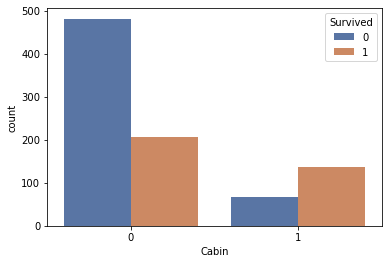

In [13]:
sns.countplot(data=train_copy,x='Cabin', hue='Survived',palette='deep')

Wow! we can see that pasengers who have a Cavin value are more likely to survive. Could this mean they own their cabin?
We definantly need to use this feature.

As we don't want to exclude 20% of observations due to the missing Age values, we will try to infer them from other observations.


In [14]:
train.corr().abs()['Age'].sort_values(ascending=False)

Age         1.000000
Pclass      0.369226
SibSp       0.308247
Parch       0.189119
Fare        0.096067
Survived    0.077221
Name: Age, dtype: float64

We can see that Age is most strongly correlated with Pclass, hence we use Pclass to infer missing age values. 
We will assign mean of age in training set for the same Pclass.

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class age_inferer(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns=None):
        self.columns = columns
       
    def fit(self, X, y=None, **fit_params):
        # fit mean age of train dataset
        self.train_mean_age = X.groupby(['Pclass'])['Age'].mean() 

        return self

    def transform(self, X, **transform_params):
        #transform missing values with series for fit step
        X['Age'] = X.apply(lambda row: self.train_mean_age[row.Pclass] if row.Age!=row.Age else row.Age, axis=1)
        
        return X

**Lets take a closer look at Name feature**

In [16]:
train_copy = train.copy()
train_copy['Title'] = train_copy.Name.str.split(',').str[1].str.split('.').str[0].str.strip()

In [17]:
df = pd.DataFrame(columns = ['Feature','Count','Survived','Survivel_Percent'])

feature = 'Title'

categories = train_copy[feature].value_counts().index.tolist()

for cat in categories:

    tmp = train_copy[(train_copy[feature]==cat)]
    cnt = len(tmp)
    cnt_target=len(train_copy[(train_copy[feature]==cat) & (train_copy['Survived']==1)])
    
    df.loc[cat] = [feature,cnt,cnt_target,cnt_target/cnt]


df.sort_index()

,Feature,Count,Survived,Survivel_Percent
Capt,Title,1,0,0.000000
Col,Title,2,1,0.500000
Don,Title,1,0,0.000000
Dr,Title,7,3,0.428571
Jonkheer,Title,1,0,0.000000
Lady,Title,1,1,1.000000
Major,Title,2,1,0.500000
Master,Title,40,23,0.575000
Miss,Title,182,127,0.697802
Mlle,Title,2,2,1.000000


We can see fairly good survival rates for Mrs, Master, Miss, and Dr, whereas bas rates for Mr and Rev. I will turn Title into a categorical feature.
Also, we will create family size feature.

In [18]:
class feature_engineering(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns=None):
        self.columns = columns
       
    def fit(self, X, y=None, **fit_params):


        return self

    def transform(self, X, **transform_params):
        #Create title categorical feature
        X['Title'] = X.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
        X['Title']  = X['Title'].apply(lambda x: x if x in ['Mrs', 'Master', 'Miss', 'Dr','Mr','Rev' ] else 'else')
        
        #crate family size feature
        
        X['Family_Size'] = X['SibSp']+X['Parch'] + 1
        X = X.drop(columns=['SibSp', 'Parch'])
        
        #crate has_cabin
        X['has_cabin'] = X['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
        
        
        return X

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")), #impute others with median value
        ("scaler", StandardScaler()) #Standardize features
    ])

In [20]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")), # mode of category
        ("cat_encoder", OneHotEncoder()),
    ])

In [21]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "Fare","Family_Size"]
cat_attribs = [ "Sex", "Embarked","Pclass","Title","has_cabin"]

columns_trans = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [22]:
full_pipeline = Pipeline([
                    ('age_inferer', age_inferer( ['Age', 'Pclass'])),
                    ('feature_engineering', feature_engineering()),
                    ('ColumnTransformer', columns_trans),
                        ])

In [23]:
y_train = train["Survived"]
train = train.drop(columns=["Survived"])
x_train = full_pipeline.fit_transform(train)


In [24]:
type(x_train)

numpy.ndarray

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score


def run_classifiers(X_train: pd.DataFrame , y_train: pd.DataFrame):#, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    df = pd.DataFrame(columns=['Model', 'Accuracy']) 
    models = [
            ('LogReg', LogisticRegression()), 
            ('RF', RandomForestClassifier()),
            ('KNN', KNeighborsClassifier()),
            ('XGB', XGBClassifier()),
            ('SVC',SVC(probability=True)),
            ('GBC',GradientBoostingClassifier()),
    ]
        
    
    for name, model in models:
        
        accuracy = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()
            
        df = df.append({'Model': name, 'Accuracy': accuracy}, ignore_index = True)
        
    return df.sort_values(by=['Accuracy'], ascending=False)

In [26]:
run_classifiers(x_train,y_train)

,Model,Accuracy
4,SVC,0.830525
0,LogReg,0.828266
5,GBC,0.826025
3,XGB,0.824920
2,KNN,0.811468
1,RF,0.803572


Support Vector Classifier has the highest accuracy

In [27]:
final_classifier = SVC(probability=True)
final_classifier.fit(x_train, y_train)

x_test = full_pipeline.transform(test)
result = final_classifier.predict(x_test)


In [28]:
submission = pd.DataFrame({'PassengerId':test.index,'Survived':result})
submission.to_csv('submissionRF_optim_param.csv',index=False)